Propondo uma análise utilizando Random Forest

In [101]:
#Bibliotecas Necessárias

import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
#carregar Data Frames

df_adultData = pd.read_csv('D:\GitHub\python-dev-test\data\AdultData.csv') #executando da maquina local

df_adultTest = pd.read_csv('D:\GitHub\python-dev-test\data\AdultTest.csv') #executando da maquina local

In [103]:
#Concatenando data frames

dataset = pd.concat([df_adultData,df_adultTest])
print (dataset.shape)
dataset.head()

(45187, 16)


,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,<=50K


In [104]:
dataset = dataset.drop(columns=['Unnamed: 0'])

In [105]:
#verificando dtypes
dataset.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week      int64
native-country     object
class              object
dtype: object

In [106]:
dataset.head(25)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,80,United-States,>50K


In [107]:
# verificando informações

dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45187.000000,4.518700e+04,45187.000000,45187.000000,45187.000000,45187.000000
mean,38.552061,1.897445e+05,10.119061,1102.235355,88.664041,40.941399
std,13.216514,1.056442e+05,2.552132,7509.274154,405.105387,12.006113
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173965e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379085e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [108]:
dataset.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week      int64
native-country     object
class              object
dtype: object

In [109]:
# Variáveis
alvo = 'capital-gain' #variável alvo
target = dataset[alvo] #Separa a variável alvo


#Variaveis Dummy
datasetQuali = ['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country','class'] #Variáveis qualitativas
dfQuali = pd.get_dummies(dataset[datasetQuali])

datasetQuant = ['age','fnlwgt','education-num','capital-loss','hours-per-week'] #Variáveis quantitativas
dfQuant = dataset[datasetQuant] #Dataframe com quantitativas
dfWork = pd.concat([dfQuali, dfQuant], axis=1) #Dataframe com todas variáveis

 

 


In [110]:
from sklearn.model_selection import train_test_split 
dfWork_train, dfWork_test = train_test_split(dfWork,  train_size=0.7)

In [111]:
from sklearn.model_selection import train_test_split 
dfWork_train, dfWork_test, target_train, target_test = train_test_split(dfWork, target, train_size=0.7)

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

dfWork_train, dfWork_test, target_train, target_test = train_test_split(
dfWork, target, train_size=0.7, random_state=42
)

print('O dataset de treino possui {} registros e o de teste {} registros.'.format(dfWork_train.shape[0], dfWork_test.shape[0]))

O dataset de treino possui 31630 registros e o de teste 13557 registros.


In [139]:
for feature,importancia in zip(dfWork.columns,rfc.feature_importances_):
    print("{}:{} %".format(feature, (importancia)*100))

workclass_ Federal-gov:0.15096558853344696 %
workclass_ Local-gov:0.640051182798493 %
workclass_ Private:1.7569066540987828 %
workclass_ Self-emp-inc:2.7113750999032016 %
workclass_ Self-emp-not-inc:1.0881883148221367 %
workclass_ State-gov:0.3466305298037545 %
workclass_ Without-pay:0.0005028722458485257 %
education_ 10th:0.008092393270613372 %
education_ 11th:0.04457252421028194 %
education_ 12th:0.06334159544687963 %
education_ 1st-4th:0.000861258119837181 %
education_ 5th-6th:0.0014516197937679079 %
education_ 7th-8th:0.006124498719526062 %
education_ 9th:0.3955256927648384 %
education_ Assoc-acdm:0.07180471180590009 %
education_ Assoc-voc:0.167862500466615 %
education_ Bachelors:0.479866831328223 %
education_ Doctorate:0.4956877838566432 %
education_ HS-grad:0.8858050712723187 %
education_ Masters:0.7751967130293508 %
education_ Preschool:0.0014476003036111473 %
education_ Prof-school:2.210082674462373 %
education_ Some-college:0.44950980316187017 %
marital-status_ Divorced:0.6715

In [140]:
target_pred=rfc.predict(dfWork_test)

In [141]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(target_test, target_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(target_test, target_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(target_test, target_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(target_test, target_pred))
print('Explained Variance Score:', metrics.explained_variance_score(target_test, target_pred))
print('Max Error:', metrics.max_error(target_test, target_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(target_test, target_pred))
print('Median Absolute Error:', metrics.median_absolute_error(target_test, target_pred))
print('R^2:', metrics.r2_score(target_test, target_pred))

Mean Absolute Error (MAE): 1923.910340291608
Mean Squared Error (MSE): 59933289.63118185
Root Mean Squared Error (RMSE): 7741.65935902516
Mean Absolute Percentage Error (MAPE): 4.6054378123809684e+18
Explained Variance Score: -0.05959284019961553
Max Error: 99999.0
Mean Squared Log Error: 20.363346930106996
Median Absolute Error: 0.0
R^2: -0.0607408160163585


In [129]:
dataset.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week      int64
native-country     object
class              object
dtype: object

In [160]:
X = dataset.iloc[:,12:13].values
y = dataset.iloc[:,10].values

In [159]:
dataset['hours-per-week']

0        13
1        40
2        40
3        40
4        40
         ..
15048    40
15049    36
15050    50
15051    40
15052    60
Name: hours-per-week, Length: 45187, dtype: int64

In [161]:
print(X)

[[13]
 [40]
 [40]
 ...
 [50]
 [40]
 [60]]


In [163]:
dataset['capital-gain']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
15048       0.0
15049       0.0
15050       0.0
15051    5455.0
15052       0.0
Name: capital-gain, Length: 45187, dtype: float64

In [162]:
print(y)

[   0.    0.    0. ...    0. 5455.    0.]


In [164]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [191]:
y_pred=regressor.predict([[40]])
y_pred

array([769.7026964])

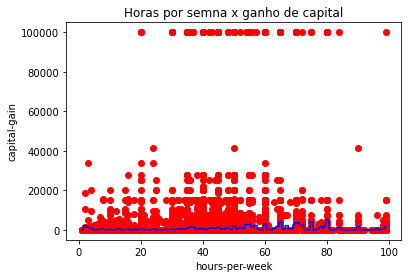

In [192]:
#higher resolution graph
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
 
plt.scatter(X,y, color='red') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='blue') #plotting for predict points
 
plt.title("Horas por semna x ganho de capital")
plt.xlabel('hours-per-week')
plt.ylabel('capital-gain')
plt.show()

In [126]:
dfWork_test.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,class_ <=50K,class_ >50K,age,fnlwgt,education-num,capital-loss,hours-per-week
2907,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,31,111567,13,0.0,70
5377,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,51,25932,9,0.0,60
5707,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,43,401623,10,0.0,40
6890,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,41,147206,8,0.0,40
11265,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,39,113151,13,0.0,55
